In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import seaborn as sns

In [2]:
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


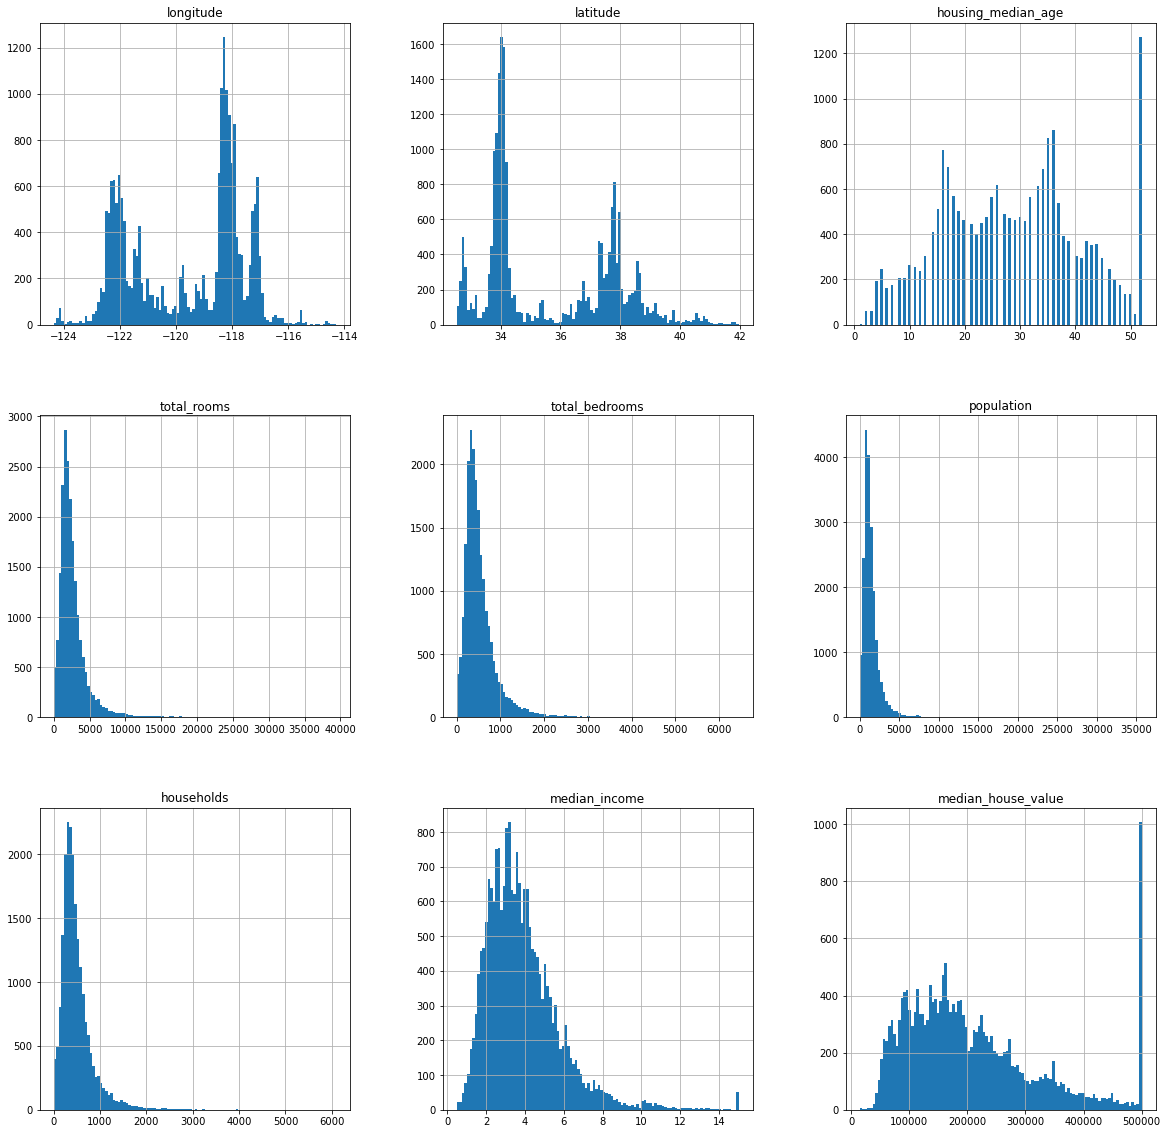

In [6]:
housing.hist(bins = 110, figsize = (20, 20));

<AxesSubplot:>

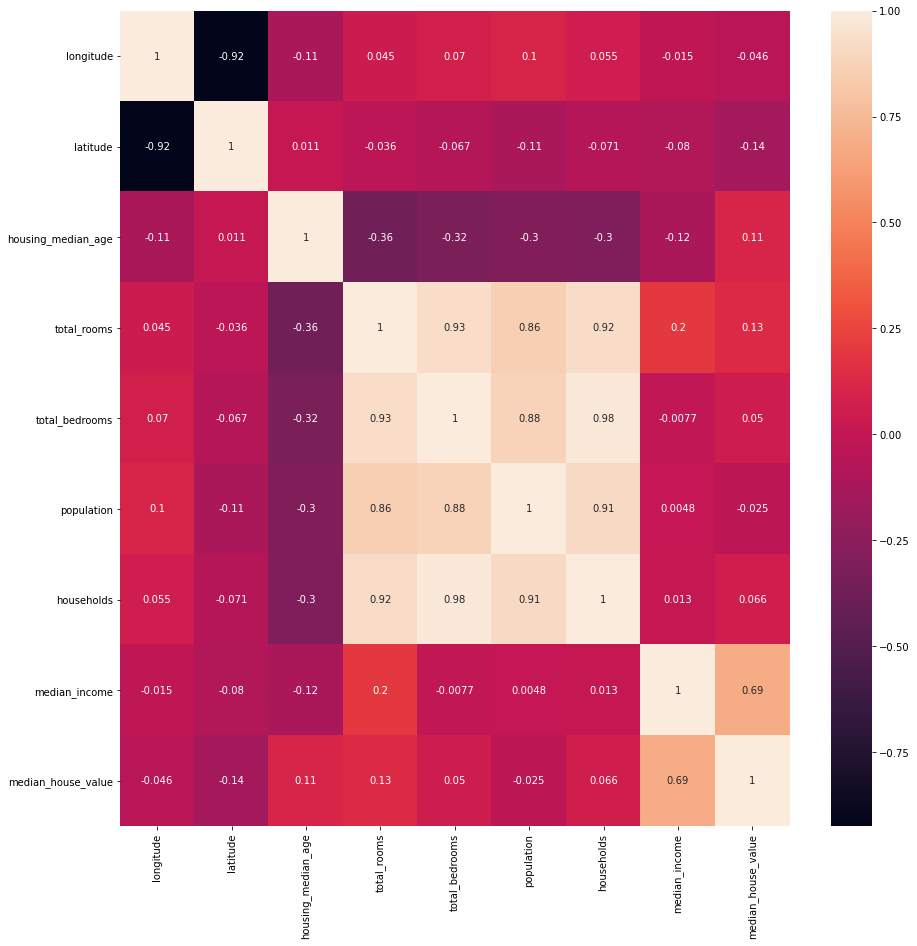

In [7]:
cor = housing.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor, annot = True)

In [8]:
# # Creating a test set of our data by randomly chossing some features
# def test_train_split(data, test_ratio):
#     np.random.seed(42)
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
# train_set , test_set = test_train_split(housing, 0.2)
# len(train_set), len(test_set)
# from sklearn.model_selection import train_test_split
# X = housing.drop("median_house_value", axis = "columns")
# Y = housing["median_house_value"]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
# Creating an income Attribute by dividing the median Income, to limit the number of income categories
housing["Income_cat"] = np.ceil(housing["median_income"]/1.5)
# Merge all categories greater than 5 into category of 5
housing["Income_cat"].where(housing["Income_cat"] < 5, 5.0, inplace = True)

In [11]:
housing["Income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: Income_cat, dtype: int64

In [12]:
1.2614/1.5

0.8409333333333334

In [13]:
housing["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [14]:
# now we are ready for stratisfied sampling using Income catogory
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
splt = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in splt.split(housing, housing["Income_cat"]):
    strat_train_index = housing.loc[train_index]
    strat_test_index  = housing.loc[test_index]


In [16]:
# Now as we have achieved our target, we can now drop the Income_cat column
for set in (strat_train_index, strat_test_index):
    set.drop(["Income_cat"], axis = "columns", inplace = True)

### Discover and visuallize the data to gain More Insights

In [17]:
# lets first create a copy of train_set
housing = strat_train_index.copy()

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,196900,NEAR OCEAN
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,46300,INLAND
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,254500,<1H OCEAN


#### Visuallizing the Geographical Data

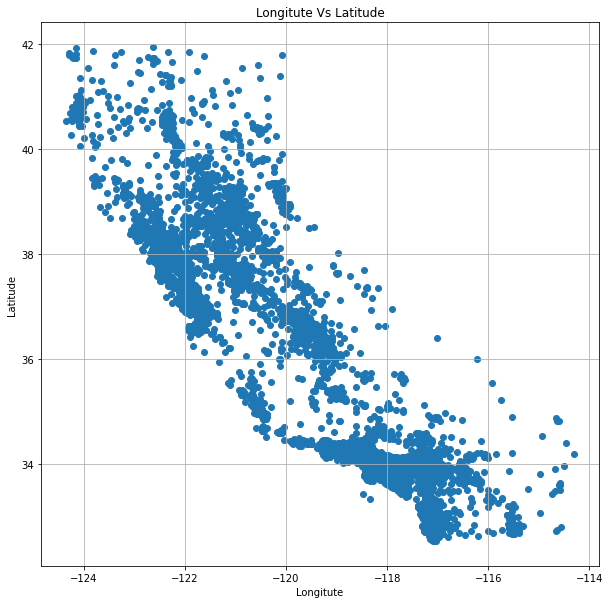

In [19]:
# Let create scatter plot for the two features Longitute and Latitude
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x = housing["longitude"], y = housing["latitude"])
ax.set(title = "Longitute Vs Latitude",
       xlabel = "Longitute",
       ylabel = "Latitude")
plt.grid()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

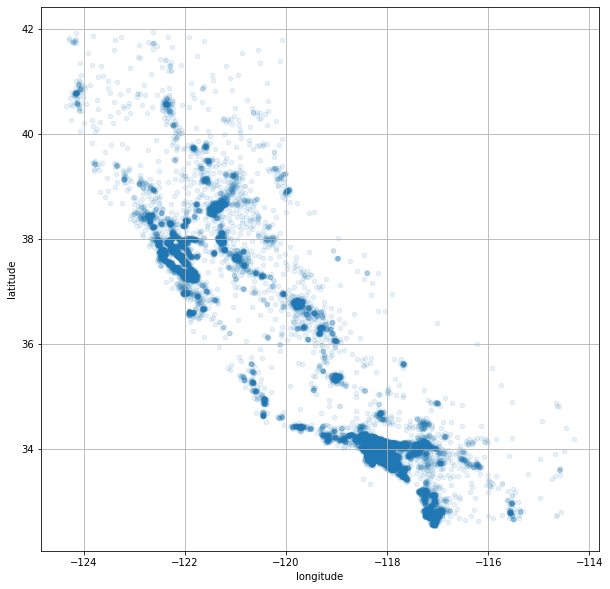

In [20]:
# Its les visual, lets set and Option alpha = 0.1
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, figsize = (10,10), grid = True)

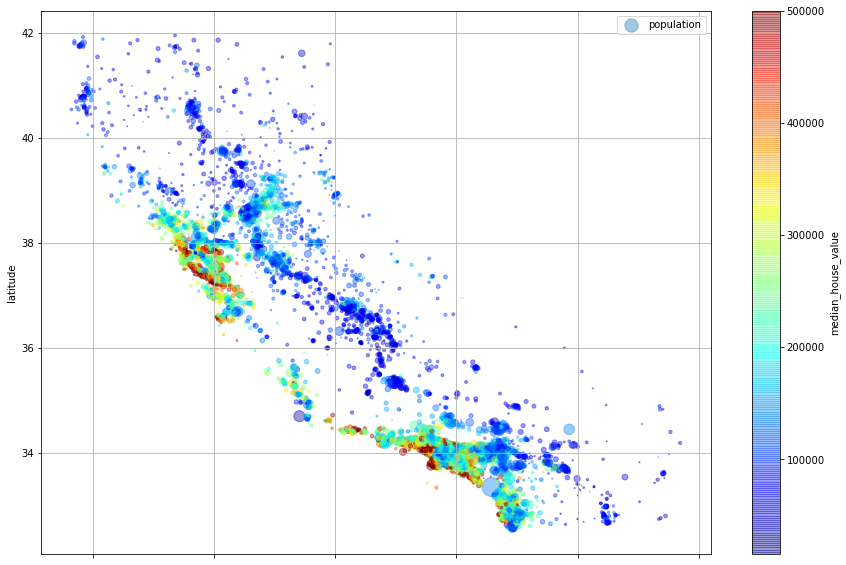

In [21]:
#  S = population size in that district, C = color, 
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
            s = housing["population"]/100, label = "population",
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            figsize = (15,10), grid = True)
plt.legend()

In [22]:
# Lets see the corelation of these features
corr_mat = housing.corr()

In [23]:
corr_mat["median_house_value"].sort_values(ascending= False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

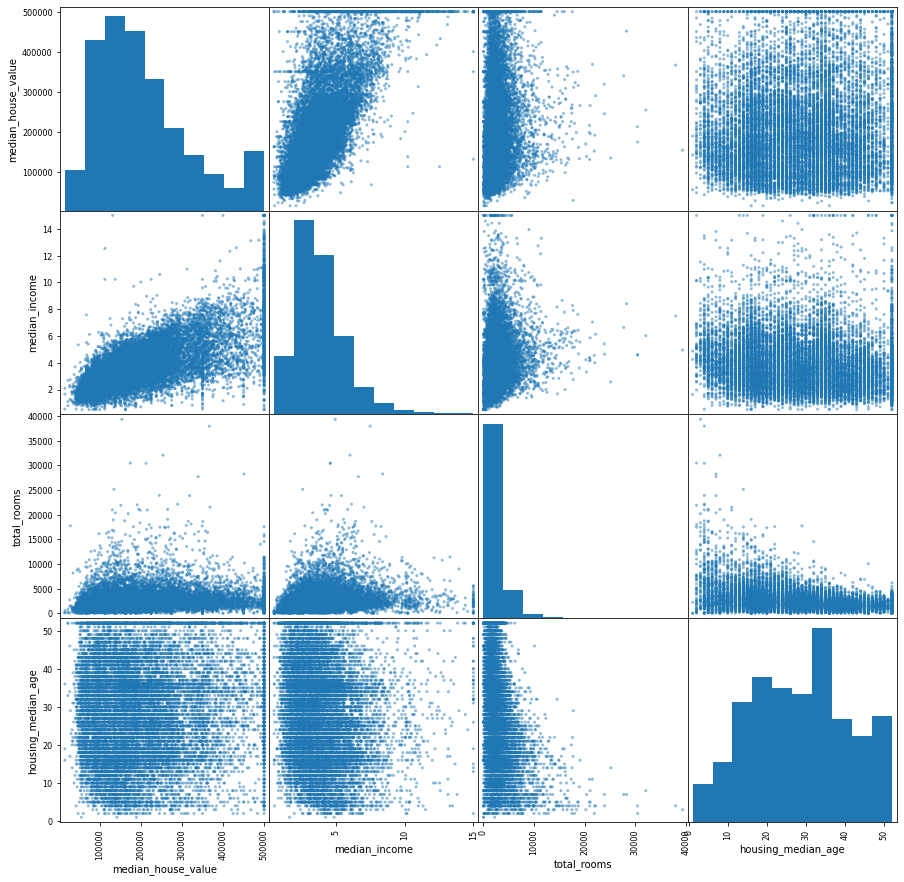

In [24]:
# Another way to check coorelation between attributes
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (15,15));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

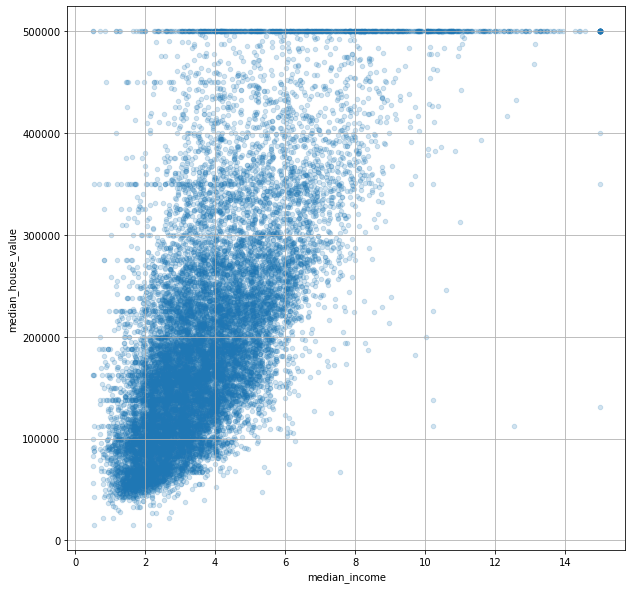

In [25]:
# Lets plot median house values with median_income attribute
housing.plot(kind = "scatter", x= "median_income", y = "median_house_value", figsize = (10,10),
            alpha = 0.2, grid = True)

### Creating new Attributes/features
`Since as we can see that some attributes alone are not giving much sence. Like total number of rooms without                   
knowing the households have no meaning. Same is the case with bedrooms. And the population per household                   
lets create these attributes`

In [26]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,196900,NEAR OCEAN


In [27]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [28]:
# Now look at the correlation Matrix
corr_mat = housing.corr()

In [29]:
corr_mat["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [30]:
# now lets make another copy of training set, also seperate the target column
housing = strat_train_index.drop("median_house_value", axis = "columns")
housing_label = strat_test_index["median_house_value"].copy()

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy= "median")

In [33]:
# Since this function only fill the columns with numerical values
housing_num = housing.drop("ocean_proximity", axis = "columns")

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
# Now you can save that trained imputed results into another variable 
X = imputer.transform(housing_num)

In [38]:
# we can also convert this into DataFrame 
housing_int = pd.DataFrame(X, columns=housing_num.columns)

In [39]:
housing_int.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Handling Text and Categorical Attributes
> Earlier we left column " Ocean_proximity"  so we have to convert this attribute into numerical

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [41]:
# We can also check the mapping this method has used with the classes_ attribute
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [42]:
# ONe issue with this is that ML algorithm will learn that two nearby values are more coorelated with each other than far off values
# The solution to this is one-hot encoding which will assign one to each binary attribute per category 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_encod_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1) )
housing_cat_encod_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# We can also apply both transformations (from text categories to numerical and from numerical to one hot vectors)
# in one Shot Using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
    
encoder = MyLabelBinarizer()
housing_cat_encod_1hot = encoder.fit_transform(housing_cat)
housing_cat_encod_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transforms
>>Although Scikit-learn provides many usefull methods, but we will definetely need our own methods for cleaning and other Purposes                                                                                                                      
>>Here we will make our own cutom class where we will transforms all the attributes we mentioned above                                                            
>>All we need is to make a base class which will have three methods :                                                                                                                        `*fit(it will return self)                                                           
   *transform()                                                                                             
   *fit_transform()                                                           `

In [44]:
# from sklearn.base import BaseEstimator , TransformerMixin
# room_ix, bedroom_ix, population_ix , household_ix = 3,4,5,6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room = True):
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self, X, y = None):
#         return self
#     def transform(self, X, y = None):
#         rooms_per_household = X[: , room_ix] / X[: , household_ix]
#         population_per_household = X[:, population_ix] / X[:, household_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
#             return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
# housing_extra_attribs = attr_adder.transform(housing.values)
            

#### Feature Scalling
`one of the most important transformation we need to apply is feature transformation.`                                     
For this we will use the class provided by sklearn. called **StandardScaler**

## Transformation Pipeline

As you can see that there are many steps that need to be done in the right order.
sklearn provides a Class **Pipeline** to help us in this.

In [45]:
# # Now it would be nice if we could feed pandas DataFrame Directly into Pipeline
# # Lets make a class
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attrib_names):
#         self.attrib_names = attrib_names
#     def fit(self, X, y = None):
#         return self
#     def transform(self, X):
#         return X[self.attrib_names].values
    
    
# # Now this will transform the desired attibutes into numpy array 

In [46]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler


# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# # Now we need a pipeline for both numerical and categorical attributes
# # number_pipeline:
# num_pipeline = Pipeline([
#     ("selector", DataFrameSelector(num_attribs)),
#     ("imputer" , SimpleImputer(strategy= "median")),
#     ("attribs_adder", CombinedAttributesAdder()),
#     ("std_scaler", StandardScaler()),
# ])

# # For categorical atributes:
# cat_pipeline = Pipeline([
#     ("selector", DataFrameSelector(cat_attribs)),
#     ("labelBinarizer", LabelBinarizer())
# ])

In [47]:
# Now we need to join these two pipelines
#  Sklearn Provides a class **Feature Union** to join Pipelines

# We will give it a list of transformers, when its transform() method is called 
# it will run each Transformar's transform() method in parallel and will wait for the output, 
# then concatenates them and return the result

In [48]:
# from sklearn.pipeline import FeatureUnion

# full_pipeline = FeatureUnion(transformer_list = [
#     ("num_pipeline", num_pipeline),
#     ("cat_pipeline", cat_pipeline),
# ])

In [49]:
# # Now you can run the whole pipeline simply 
# housing_prepared = full_pipeline.fit_transform(housing)
# housing_prepared

## Again Creating a class To collect Atrributes

In [50]:

from sklearn.base import TransformerMixin , BaseEstimator

rooms_ix, bedrooms_ix, population_ix, househould_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix]/X[:,househould_ix ]
        population_per_household = X[:, population_ix] / X[:, househould_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

        
attribs_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attribs_adder.transform(housing.values)

### Feature Scalling and Transformation Pipeline

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scalar", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs_names):
        self.attribs_names = attribs_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribs_names].values
        

In [53]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("Selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy= "median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("sty_scalar", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("Selector", DataFrameSelector(cat_attribs)),
    ("label_binarizer", MyLabelBinarizer()),
])



In [54]:
# Now lets join these pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [55]:
house_prepared = full_pipeline.fit_transform(housing)


In [56]:
house_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
house_prepared.shape

(16512, 16)

In [58]:
np.size(housing_label), np.size(house_prepared)

(4128, 264192)

In [59]:
np.size(housing_label.iloc[:4127])

4127

## Training and evaluating on the training set

In [60]:

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(house_prepared[:4128], housing_label)

LinearRegression()

In [61]:
# This above method is not working 

In [62]:
# Lets try on smaller training sets
some_features = housing.iloc[:5]
some_labels = housing_label.iloc[:5]

some_data_prepared = full_pipeline.transform(some_features)
print("Prediction" , lin_model.predict(some_data_prepared))

print("Labels :" , list(some_labels))

Prediction [212590.66487732 205126.90046489 215140.2663276  203011.44876406
 187562.48535832]
Labels : [500001, 240300, 218200, 182100, 121300]


In [66]:
from sklearn.metrics import mean_squared_error
lin_model_predictions = lin_model.predict(house_prepared[:4128])
lin_mse = mean_squared_error(housing_label,lin_model_predictions)
lin_rmse = np.sqrt( lin_mse)
lin_rmse


113779.30833541931

In [64]:
new_house_preds = house_prepared[:4128]

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(new_house_preds, housing_label)

DecisionTreeRegressor()